In [9]:
FILE_PATH = 'data\\train.txt'

Total unique 3-grams: 6575


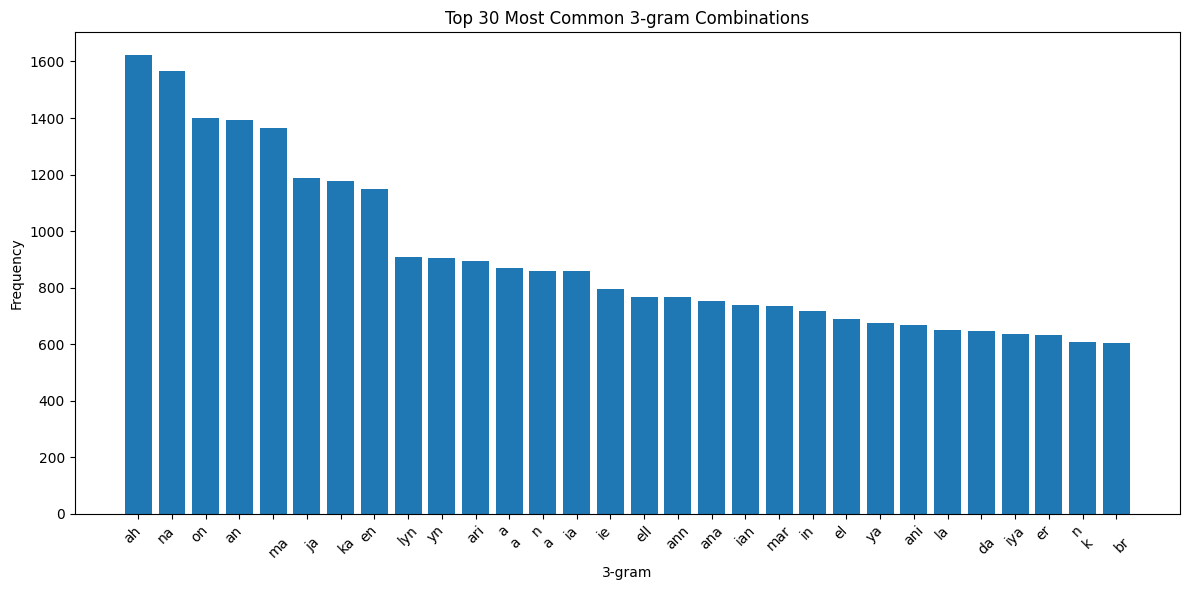

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

# ==== CONFIGURATION ====
CONTEXT_LENGTH = 3  # Change this value from 2 to 8 as needed
FILE_PATH = 'data\\train.txt'  # Path to your .txt file
TOP_K = 30  # Show top K most common n-grams in plot
# =======================

ngram_counter = None

def read_file_with_newlines(path):
    """Reads the text file and preserves newline characters as '\n'."""
    with open(path, 'r', encoding='utf-8') as f:
        text = f.read()
    return text

def generate_ngrams(text, context_length):
    """Generates n-grams of specified length from text."""
    return [text[i:i+context_length] for i in range(len(text) - context_length + 1)]

def plot_ngrams(counter, context_length, top_k=30):
    """Plots a histogram of the most common n-grams."""
    most_common = counter.most_common(top_k)
    ngrams, counts = zip(*most_common)

    plt.figure(figsize=(12, 6))
    plt.bar(ngrams, counts)
    plt.title(f"Top {top_k} Most Common {context_length}-gram Combinations")
    plt.xlabel(f"{context_length}-gram")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    global ngram_counter
    text = read_file_with_newlines(FILE_PATH)
    ngrams = generate_ngrams(text, CONTEXT_LENGTH)
    ngram_counter = Counter(ngrams)
    print(f"Total unique {CONTEXT_LENGTH}-grams: {len(ngram_counter)}")
    plot_ngrams(ngram_counter, CONTEXT_LENGTH, TOP_K)

if __name__ == '__main__':
    main()


In [8]:
print(ngram_counter)

Counter({'ah\n': 1622, 'na\n': 1568, 'on\n': 1401, 'an\n': 1394, '\nma': 1365, '\nja': 1186, '\nka': 1177, 'en\n': 1149, 'lyn': 910, 'yn\n': 904, 'ari': 895, 'a\na': 870, 'n\na': 860, 'ia\n': 859, 'ie\n': 796, 'ell': 767, 'ann': 765, 'ana': 754, 'ian': 740, 'mar': 735, 'in\n': 717, 'el\n': 688, 'ya\n': 675, 'ani': 666, 'la\n': 649, '\nda': 648, 'iya': 636, 'er\n': 634, 'n\nk': 609, '\nbr': 605, 'lan': 599, '\nal': 598, 'nna': 594, '\nca': 594, 'ni\n': 589, '\nan': 588, 'ra\n': 587, 'a\nk': 581, 'nn\n': 571, 'ee\n': 569, 'ey\n': 565, 'ale': 564, '\nsa': 558, '\nke': 550, 'ne\n': 548, 'ali': 544, 'sha': 533, 'e\na': 515, 'eli': 498, 'n\nm': 496, '\nde': 494, 'a\nm': 491, 'lee': 488, 'yah': 486, 'lia': 483, 'ynn': 481, 'ria': 478, '\nha': 477, 'n\nj': 473, 'lin': 462, '\nel': 455, 'a\nj': 452, '\nar': 450, 'ayl': 450, '\nla': 447, 'han': 442, '\nna': 442, 'yan': 441, '\nra': 440, 'iah': 437, 'ri\n': 425, '\nza': 421, 'ley': 419, 'a\ns': 418, 'ama': 413, '\njo': 407, '\nsh': 403, '\nta': 3

Total unique 3-grams: 6575

Sample of contexts → most likely next token:

  'ray' → 'l'
  'ayv' → 'i'
  'yvo' → 'n'
  'von' → '
'
  'on
' → 'a'
  'n
t' → 'a'
  '
ta' → 'y'
  'taw' → 'h'
  'awh' → 'i'
  'whi' → 't'
  'hid' → '
'
  'id
' → 'a'
  'd
r' → 'i'
  '
ri' → 'c'
  'rid' → 'a'
  'idh' → 'i'
  'dhi' → '
'
  'hi
' → 'a'
  'i
s' → 'a'
  '
so' → 'l'
  ...


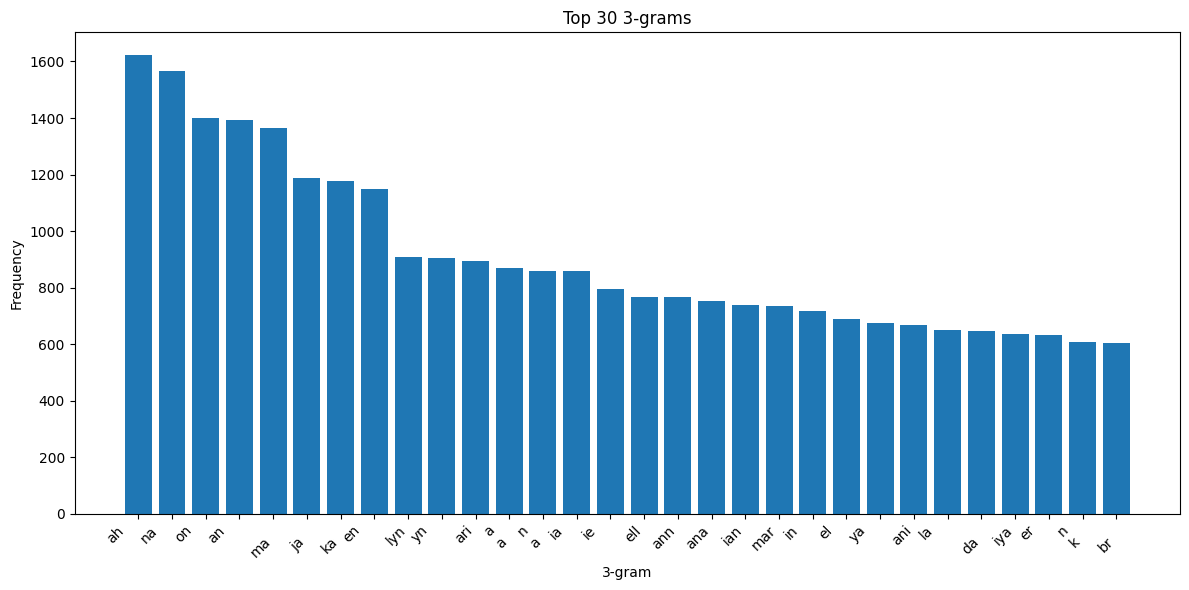

In [10]:
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

# ==== CONFIGURATION ====
CONTEXT_LENGTH = 3     # change between 2 and 8
#FILE_PATH = 'names.txt'  
TOP_K = 30             # how many top n-grams to plot
# =======================

def read_file_with_newlines(path):
    """Read the entire file as one string (preserving '\\n')."""
    with open(path, 'r', encoding='utf-8') as f:
        return f.read()

def generate_ngrams_and_nexts(text, context_length):
    """
    Slide a window of size context_length over text;
    for each position i, record:
      context = text[i:i+context_length]
      next_char = text[i+context_length] (if exists)
    Returns:
      - contexts: Counter of how many times each context appears
      - next_map: dict mapping context -> Counter of next chars
    """
    contexts = Counter()
    next_map = defaultdict(Counter)
    for i in range(len(text) - context_length):
        ctx = text[i:i+context_length]
        nxt = text[i+context_length]
        contexts[ctx] += 1
        next_map[ctx][nxt] += 1
    return contexts, next_map

def most_likely_next_token(next_map):
    """
    From next_map (ctx -> Counter of next chars),
    produce a dict: ctx -> single most common next char.
    """
    return {ctx: counter.most_common(1)[0][0]
            for ctx, counter in next_map.items()}

def plot_top_ngrams(contexts, context_length, top_k=30):
    """Bar-plot of the top_k most frequent contexts."""
    most_common = contexts.most_common(top_k)
    ngrams, counts = zip(*most_common)

    plt.figure(figsize=(12,6))
    plt.bar(ngrams, counts)
    plt.title(f"Top {top_k} {context_length}-grams")
    plt.xlabel(f"{context_length}-gram")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def main():
    # 1) Read
    text = read_file_with_newlines(FILE_PATH)

    # 2) Generate n-grams and next-char counts
    contexts, next_map = generate_ngrams_and_nexts(text, CONTEXT_LENGTH)

    # 3) Derive most likely next-token for each context
    next_token_for = most_likely_next_token(next_map)

    # 4) Output
    print(f"Total unique {CONTEXT_LENGTH}-grams: {len(contexts)}\n")
    print(f"Sample of contexts → most likely next token:\n")
    for i, (ctx, nxt) in enumerate(next_token_for.items()):
        print(f"  '{ctx}' → '{nxt}'")
        if i >= 19:  # show only first 20 for brevity
            print("  ...")
            break

    # 5) (Optional) Plot top contexts
    plot_top_ngrams(contexts, CONTEXT_LENGTH, TOP_K)

if __name__ == '__main__':
    main()



Total unique 3-grams: 6575

Showing full 27-token distributions for the top 10 contexts:

Context: 'ah
'  (count: 1622)
    'a' : 240
    'k' : 140
    'm' : 131
    'j' : 128
    'e' : 91
    's' : 90
    'd' : 83
    'l' : 80
    'r' : 80
    'c' : 78
    't' : 71
    'b' : 66
    'z' : 54
    'n' : 53
    'h' : 39
    'g' : 34
    'y' : 30
    'f' : 26
    'p' : 25
    'v' : 21
    'i' : 16
    'w' : 16
    'o' : 13
    'q' : 6
    'u' : 6
    'x' : 5
   '\n' : 0

Context: 'na
'  (count: 1568)
    'a' : 198
    'k' : 150
    'm' : 135
    'j' : 117
    's' : 94
    'd' : 86
    'c' : 79
    'r' : 77
    'l' : 75
    'e' : 74
    't' : 68
    'b' : 63
    'z' : 57
    'n' : 54
    'h' : 51
    'g' : 37
    'p' : 25
    'y' : 23
    'f' : 22
    'w' : 19
    'i' : 17
    'v' : 17
    'o' : 15
    'x' : 8
    'q' : 5
    'u' : 2
   '\n' : 0

Context: 'on
'  (count: 1401)
    'a' : 175
    'k' : 134
    'm' : 109
    'j' : 101
    's' : 85
    'd' : 81
    'r' : 80
    'c' : 77
    'e' 

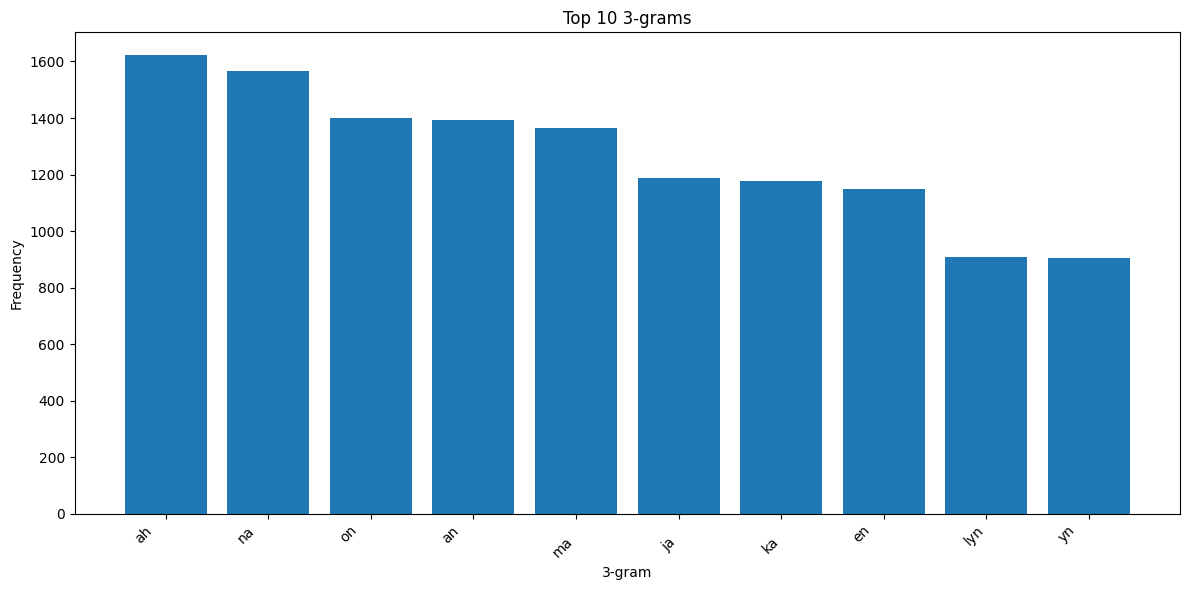

In [11]:
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import string

# ==== CONFIGURATION ====
CONTEXT_LENGTH = 3     # change between 2 and 8
#FILE_PATH = 'names.txt'  
TOP_K = 10             # how many top contexts to display with full distribution
# =======================

# Define your full token set: a–z plus newline
TOKENS = list(string.ascii_lowercase) + ['\n']

def read_file_with_newlines(path):
    """Read the entire file as one string (preserving '\\n')."""
    with open(path, 'r', encoding='utf-8') as f:
        return f.read()

def generate_ngrams_and_nexts(text, context_length):
    """
    Slide a window of size context_length over text;
    for each position i, record:
      context = text[i:i+context_length]
      next_char = text[i+context_length]
    Returns:
      - contexts: Counter of how many times each context appears
      - next_map: dict mapping context -> Counter of next chars
    """
    contexts = Counter()
    next_map = defaultdict(Counter)
    for i in range(len(text) - context_length):
        ctx = text[i:i+context_length]
        nxt = text[i+context_length]
        contexts[ctx] += 1
        next_map[ctx][nxt] += 1
    return contexts, next_map

def get_full_distribution(next_map, tokens):
    """
    For each context in next_map, produce a list of (token, count)
    for every token in `tokens`, sorted descending by count.
    Returns:
      dict: context -> [(token, count), ...]
    """
    full_dist = {}
    for ctx, counter in next_map.items():
        dist = [(t, counter.get(t, 0)) for t in tokens]
        dist.sort(key=lambda x: -x[1])
        full_dist[ctx] = dist
    return full_dist

def plot_top_ngrams(contexts, context_length, top_k=30):
    """Bar-plot of the top_k most frequent contexts."""
    most_common = contexts.most_common(top_k)
    ngrams, counts = zip(*most_common)

    plt.figure(figsize=(12,6))
    plt.bar(ngrams, counts)
    plt.title(f"Top {top_k} {context_length}-grams")
    plt.xlabel(f"{context_length}-gram")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def main():
    # 1) Read
    text = read_file_with_newlines(FILE_PATH)

    # 2) Generate n-grams and next-char counts
    contexts, next_map = generate_ngrams_and_nexts(text, CONTEXT_LENGTH)

    # 3) Build the full distribution for each context
    full_dist = get_full_distribution(next_map, TOKENS)

    # 4) Print summary
    print(f"Total unique {CONTEXT_LENGTH}-grams: {len(contexts)}\n")

    # 5) Show full 27-token distribution for the TOP_K most frequent contexts
    print(f"Showing full {len(TOKENS)}-token distributions for the top {TOP_K} contexts:\n")
    for ctx, _ in contexts.most_common(TOP_K):
        print(f"Context: '{ctx}'  (count: {contexts[ctx]})")
        for token, count in full_dist[ctx]:
            print(f"   {repr(token):>4} : {count}")
        print()

    # 6) (Optional) Plot top contexts
    plot_top_ngrams(contexts, CONTEXT_LENGTH, TOP_K)

if __name__ == '__main__':
    main()
